In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import os
import tqdm
import importlib
reload= importlib.reload
import numpy
from galpy.util import bovy_plot
import measure_tgas_kinematics
%pylab inline
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import NullFormatter, FuncFormatter, LogFormatter
from matplotlib import gridspec
import copy
save_figures= False
numpy.random.seed(3)

/Users/bovy/Repos/tgas-completeness/py/effsel.py:32: RuntimeWarning: invalid value encountered in less_equal
  sp_indx*= (numpy.roll((sp['JH']+sp['HK']),1)-(sp['JH']+sp['HK'])) <= 0.

Populating the interactive namespace from numpy and matplotlib


# The vertical kinematics of different stellar types in *TGAS*

## Full stellar types:

In [2]:
reload(measure_tgas_kinematics)

<module 'measure_tgas_kinematics' from '/Users/bovy/Repos/simple-m2m/py/measure_tgas_kinematics.py'>

In [3]:
def plot_full_kinematics(s2z,s2z_err,cutz=1,dpop=10):
    for ii in range(len(s2z)-cutz):
        subplot(len(s2z),2,2*ii+1)
        errorbar(500.*(numpy.roll(zbins,-1)+zbins)[:-1],
                s2z[ii],yerr=s2z_err[ii],ls='None',marker='o')
        xlabel(r'$Z\,(\mathrm{pc})$')
        ylabel(r'$\langle v_z^2 \rangle\,(\mathrm{km^2\,s}^{-2})$')
        ylim(0.,400.)
        xlim(-420,420)
        subplot(len(s2z),2,2*ii+2)
        errorbar(500.*(numpy.roll(zbins,-1)+zbins)[:-1],
                numpy.sqrt(s2z[ii]),yerr=0.5*s2z_err[ii]/numpy.sqrt(s2z[ii]),ls='None',marker='o')
        ylim(0.,25.)
        xlim(-420,420)
        xlabel(r'$Z\,(\mathrm{pc})$')
        ylabel(r'$\sqrt{\langle v_z^2 \rangle}\,(\mathrm{km\,s}^{-1})$')  
        bovy_plot.bovy_text(spt_label(ii,dpop),size=18.,bottom_left=True)
def spt_label(ii,dpop):
    spt= ii*dpop
    if spt//10 == 0:
        lbl= 'A'
    elif spt//10 == 1:
        lbl= 'F'
    elif spt//10 == 2:
        lbl= 'G'
    elif spt//10 == 3:
        lbl= 'K'
    elif spt//10 == 4:
        lbl= 'M'
    lbl= r'$\mathrm{%s}' % lbl
    lbl+= r'%i$-$%i$' % (spt % 10,((ii+1)*dpop-1) % 10)
    return lbl

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':



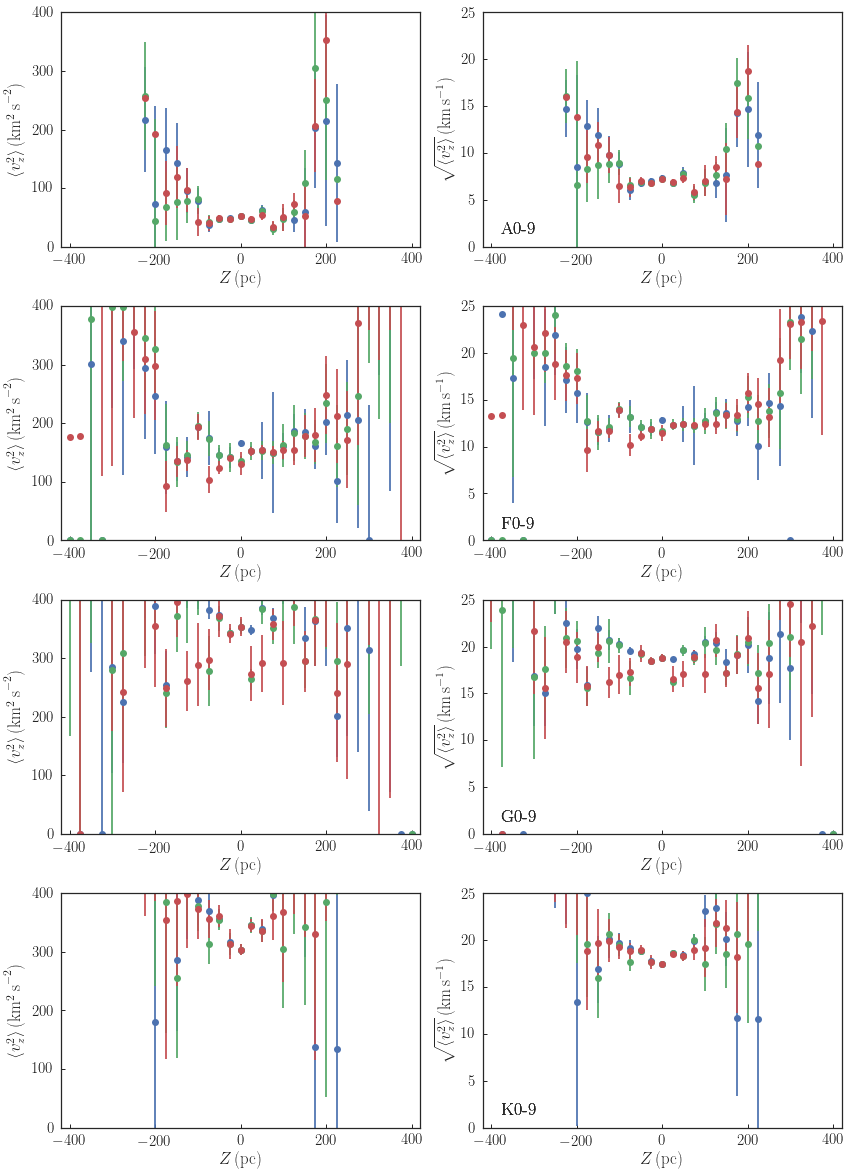

In [4]:
s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g2_b200_dpop10.csv')
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
figsize(12,4*len(s2z))
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=1,dpop=10)

s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g3_b200_dpop10.csv')
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=1,dpop=10)

s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g4_b200_dpop10.csv')
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=1,dpop=10)
tight_layout()

## Half-stellar types

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':



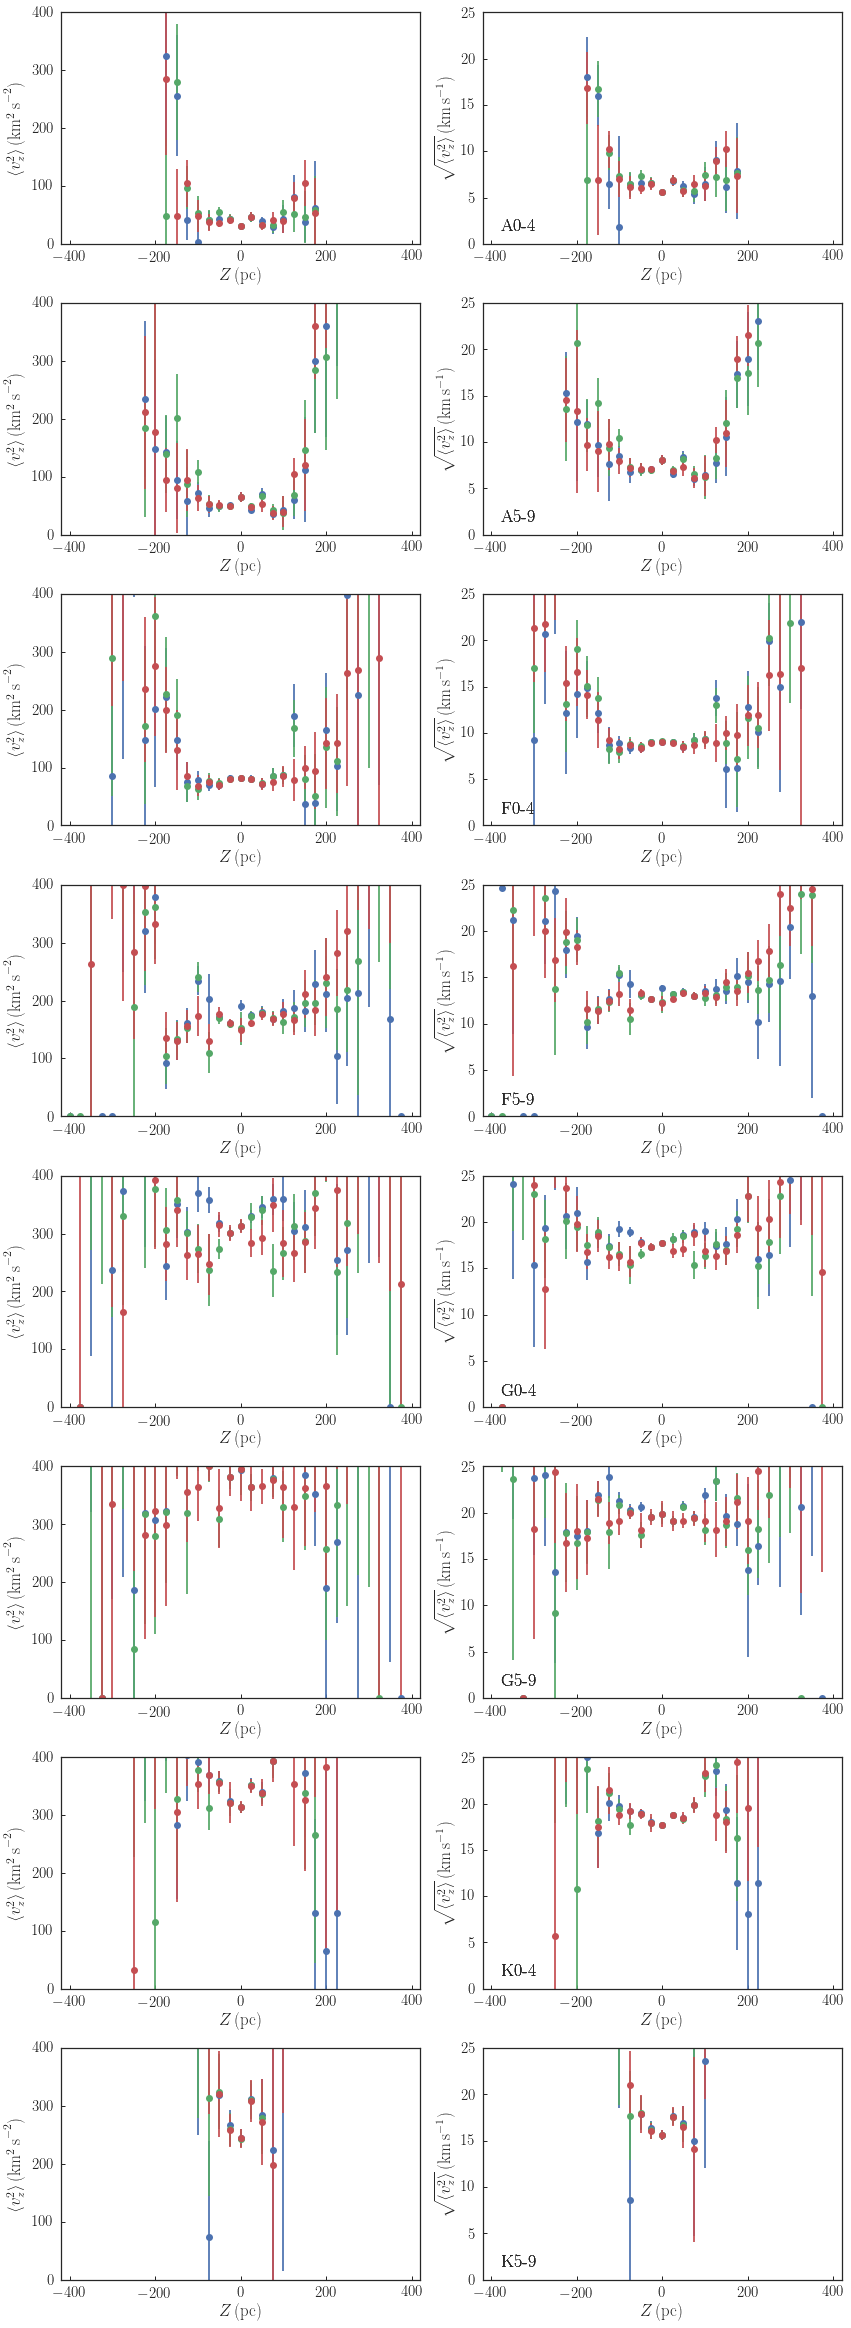

In [5]:
s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g2_b200_dpop5.csv')
figsize(12,4*len(s2z))
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=2,dpop=5)

s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g3_b200_dpop5.csv')
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=2,dpop=5)

s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g4_b200_dpop5.csv')
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=2,dpop=5)
tight_layout()

## Narrow stellar types

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':



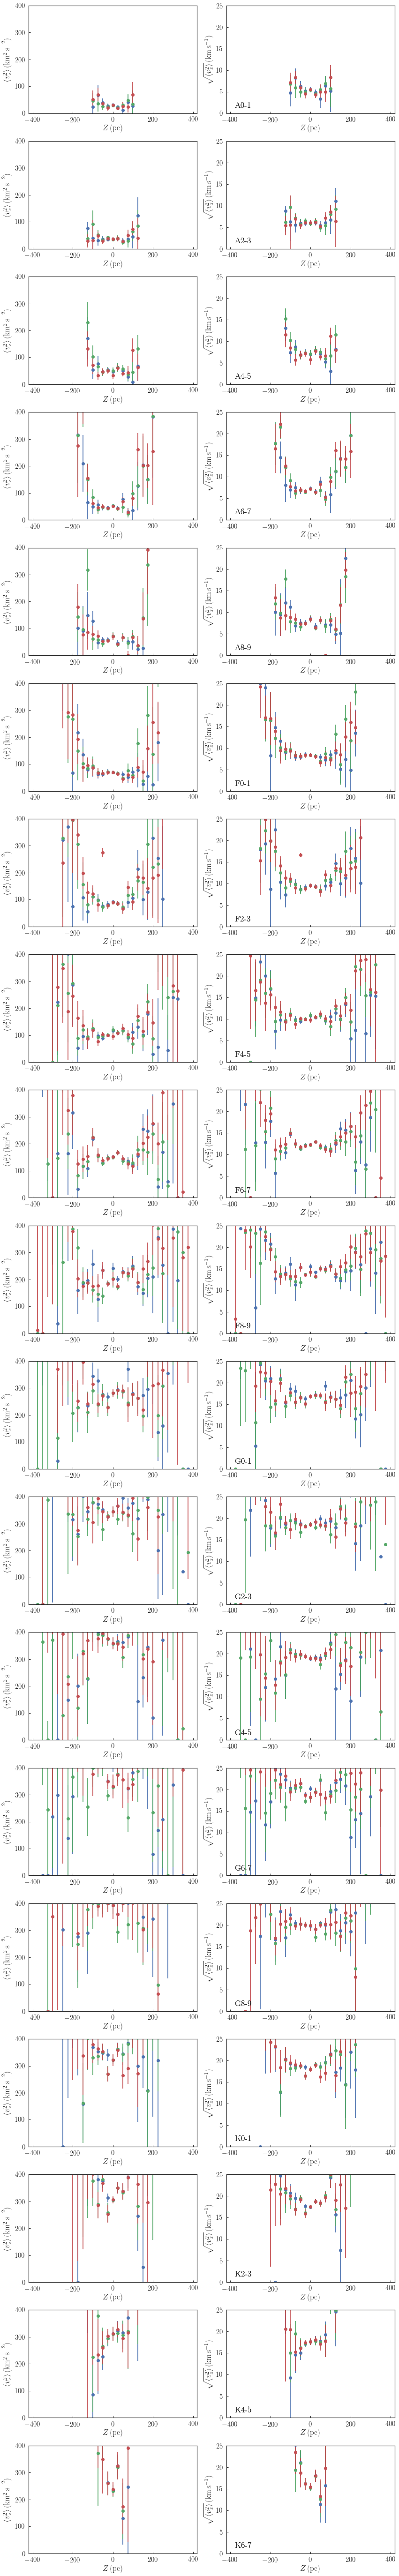

In [6]:
s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g2_b200_dpop2.csv')
figsize(12,4*len(s2z))
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=4,dpop=2)

s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g3_b200_dpop2.csv')
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=4,dpop=2)

s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g4_b200_dpop2.csv')
zbins= measure_tgas_kinematics.define_zbins()
plot_full_kinematics(s2z,s2z_err,cutz=4,dpop=2)
tight_layout()

## Velocity at $z=0$ vs. spectral type

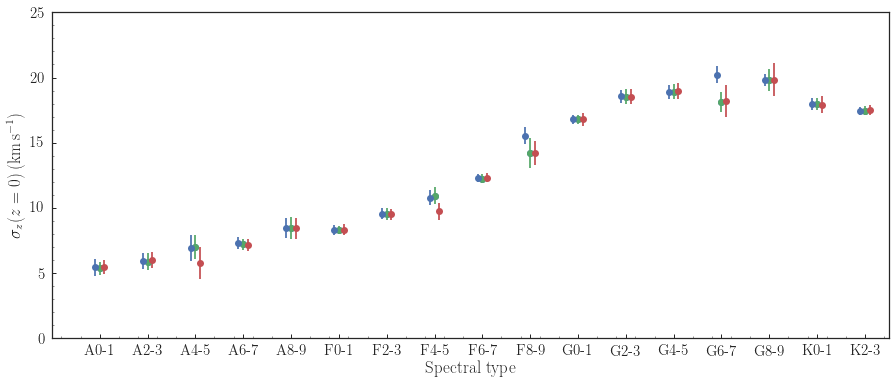

In [29]:
figsize(15,6)
s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g3_b200_dpop2.csv')
indx= len(s2z[0])//2
bovy_plot.bovy_plot(numpy.arange(len(s2z)),
                    numpy.sqrt(s2z[:,indx]),
                    'o',xrange=[-1.,16.5],
                   yrange=[0.,25.])
errorbar(numpy.arange(len(s2z)),
                numpy.sqrt(s2z[:,indx]),yerr=0.5*s2z_err[:,indx]/numpy.sqrt(s2z[:,indx]),ls='None',marker='o',
        color=sns.color_palette()[1])
if True:
    s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g2_b200_dpop2.csv')
    errorbar(numpy.arange(len(s2z))-0.1,
                    numpy.sqrt(s2z[:,indx]),yerr=0.5*s2z_err[:,indx]/numpy.sqrt(s2z[:,indx]),ls='None',marker='o',
            color=sns.color_palette()[0])
    s2z, s2z_err= measure_tgas_kinematics.read_kinematics('kin_v2/tgas_kin_g4_b200_dpop2.csv')
    errorbar(numpy.arange(len(s2z))+0.1,
                    numpy.sqrt(s2z[:,indx]),yerr=0.5*s2z_err[:,indx]/numpy.sqrt(s2z[:,indx]),ls='None',marker='o',
            color=sns.color_palette()[2])
xlabels= [spt_label(ii,dpop=2) for ii in range(len(s2z))]
gca().xaxis.set_ticks(numpy.arange(len(s2z))[:17:1])
_= gca().xaxis.set_ticklabels(xlabels[::1])
xlabel(r'$\mathrm{Spectral\ type}$')
ylabel(r'$\sigma_{z}(z=0)\,(\mathrm{km\,s}^{-1})$')